In [1]:
import numpy as np
import random
import torch
import torch.nn as nn
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns

from IPython.display import display, clear_output

sns.set_theme()

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0)

%load_ext autoreload
%autoreload 2

In [67]:
n = 64

model = nn.Sequential(
    nn.Linear(1, n), 
    nn.ReLU(),
    nn.Linear(n, 1), 
    nn.Tanh()
)

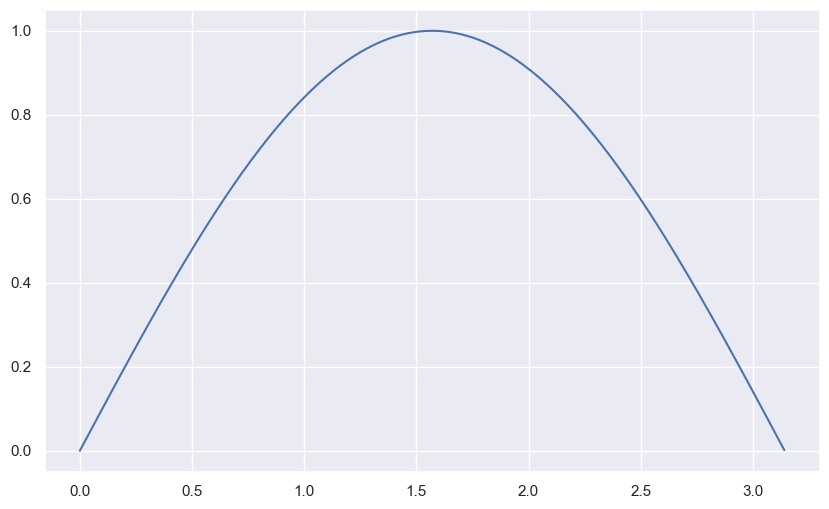

In [68]:
h = 0.01
t = np.arange(0, np.pi, h)
y = np.sin(t)
plt.plot(t, y)

In [69]:
t = torch.FloatTensor(t)[:, None]
y = torch.FloatTensor(y)[:, None]

In [70]:
t.shape

torch.Size([315, 1])

In [71]:
mse = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

In [72]:
epoch_n = 10000
for _ in range(epoch_n):
    y_pred = model(t)
    loss = mse(y, y_pred)
    print(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

tensor(0.9505, grad_fn=<MseLossBackward0>)
tensor(0.8702, grad_fn=<MseLossBackward0>)
tensor(0.7925, grad_fn=<MseLossBackward0>)
tensor(0.7183, grad_fn=<MseLossBackward0>)
tensor(0.6482, grad_fn=<MseLossBackward0>)
tensor(0.5827, grad_fn=<MseLossBackward0>)
tensor(0.5224, grad_fn=<MseLossBackward0>)
tensor(0.4676, grad_fn=<MseLossBackward0>)
tensor(0.4182, grad_fn=<MseLossBackward0>)
tensor(0.3743, grad_fn=<MseLossBackward0>)
tensor(0.3357, grad_fn=<MseLossBackward0>)
tensor(0.3021, grad_fn=<MseLossBackward0>)
tensor(0.2730, grad_fn=<MseLossBackward0>)
tensor(0.2482, grad_fn=<MseLossBackward0>)
tensor(0.2270, grad_fn=<MseLossBackward0>)
tensor(0.2091, grad_fn=<MseLossBackward0>)
tensor(0.1941, grad_fn=<MseLossBackward0>)
tensor(0.1815, grad_fn=<MseLossBackward0>)
tensor(0.1710, grad_fn=<MseLossBackward0>)
tensor(0.1622, grad_fn=<MseLossBackward0>)
tensor(0.1550, grad_fn=<MseLossBackward0>)
tensor(0.1490, grad_fn=<MseLossBackward0>)
tensor(0.1440, grad_fn=<MseLossBackward0>)
tensor(0.13

In [73]:
y_pred = model(t).detach().numpy()
t = t.numpy()

In [74]:
t.shape, y_pred.shape

((315, 1), (315, 1))

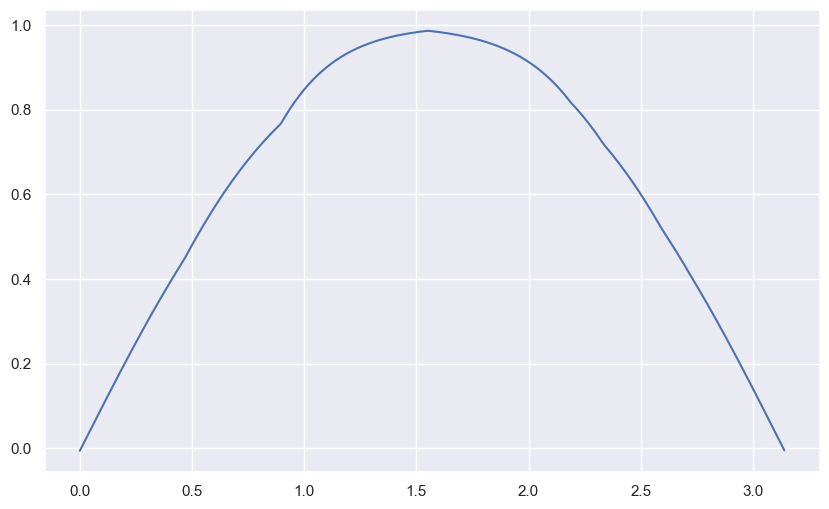

In [75]:
plt.plot(t, y_pred)